<a href="https://colab.research.google.com/github/WilliamAshbee/3d-synth-data/blob/main/3d2dprepwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np

In [26]:
a = np.array([i for i in range(16)])

In [27]:
a = a.reshape(-1,1,1).repeat(16,axis=1).repeat(16,axis=2)

In [28]:
x = a.copy()
y = a.transpose(1,0,2)
z = a.transpose(2,1,0)


In [49]:
print(x[:,0,0])
print(y[0,:,0])
print(z[0,0,:])
assert(x[:,0,0].sum()==y[0,:,0].sum())
assert(z[0,0,:].sum()==y[0,:,0].sum())
assert(x[:,0,0].sum()!=0)

a = z.copy()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [29]:
x2d = np.zeros((64,64))
y2d = np.zeros_like(x2d)
z2d = np.zeros_like(x2d)


In [30]:
x3dind = []
y3dind = []
z3dind = []

x2dind = []
y2dind = []

for i in range(16):
  for j in range(16):
    for k in range(16):
      x3dind.append(i)
      y3dind.append(j)
      z3dind.append(k)
      
      x2dind.append(i*4+k%4)
      y2dind.append(j*4+k//4)





In [31]:
x2d[8:12,8:12]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
x2d[x2dind,y2dind] = x[x3dind,y3dind,z3dind]
y2d[x2dind,y2dind] = y[x3dind,y3dind,z3dind]
z2d[x2dind,y2dind] = z[x3dind,y3dind,z3dind]


In [33]:
print(x2d[x2dind,y2dind].shape,x[x3dind,y3dind,z3dind].shape)
print(y2d[x2dind,y2dind].shape,y[x3dind,y3dind,z3dind].shape)
print(z2d[x2dind,y2dind].shape,z[x3dind,y3dind,z3dind].shape)
print(x2d[x2dind,y2dind].sum(),x[x3dind,y3dind,z3dind].sum())
print(y2d[x2dind,y2dind].sum(),y[x3dind,y3dind,z3dind].sum())
print(z2d[x2dind,y2dind].sum(),z[x3dind,y3dind,z3dind].sum())
assert((x2d[x2dind,y2dind].astype(int)!=x[x3dind,y3dind,z3dind].astype(int)).sum() == 0)
assert((y2d[x2dind,y2dind].astype(int)!=y[x3dind,y3dind,z3dind].astype(int)).sum() == 0)
assert((z2d[x2dind,y2dind].astype(int)!=z[x3dind,y3dind,z3dind].astype(int)).sum() == 0)
assert z2d[x2dind,y2dind].shape[0] == len(x2dind)
assert(int(y2d[x2dind,y2dind].sum())== int(y[x3dind,y3dind,z3dind].sum()))
assert(int(z2d[x2dind,y2dind].sum())== int(z[x3dind,y3dind,z3dind].sum()))
assert(int(x2d[x2dind,y2dind].sum())== int(y[x3dind,y3dind,z3dind].sum()))
assert(int(y2d[x2dind,y2dind].sum())== int(z[x3dind,y3dind,z3dind].sum()))
assert(int(y2d[x2dind,y2dind].sum())!= 0)



(4096,) (4096,)
(4096,) (4096,)
(4096,) (4096,)
30720.0 30720
30720.0 30720
30720.0 30720


In [56]:
for i in range(16):
  for j in range(16):
    print('i,j,val',i,j,x2d[4*i:4*(i+1),j*4:(j+1)*4])
    
for i in range(16):
  for j in range(16):
    print('i,j,val',i,j,y2d[4*i:4*(i+1),j*4:(j+1)*4])

for i in range(16):
  for j in range(16):
    print('i,j,val',i,j,z2d[4*i:4*(i+1),j*4:(j+1)*4])
    assert z2d[4*i:4*(i+1),j*4:(j+1)*4][0,1] == 1
    assert z2d[4*i:4*(i+1),j*4:(j+1)*4][1,0] == 4

i,j,val 0 0 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 1 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 3 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 4 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 5 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 6 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 7 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 8 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 9 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 10 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 11 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 12 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
i,j,val 0 13 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 

AssertionError: ignored

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 [[ 0.  4.  8. 12.]
 [ 1.  5.  9. 13.]
 [ 2.  6. 10. 14.]
 [ 3.  7. 11. 15.]]
0.0 4.0


AssertionError: ignored

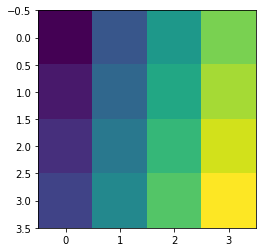

In [54]:
import matplotlib.pyplot as plt

a2d = np.zeros((64,64))
a2d[x2dind,y2dind] = a[x3dind,y3dind,z3dind]

plt.clf()
plt.imshow(a2d[:4,:4])
print(a[0,0,:],'\n', a2d[:4,:4])

print(a2d[0,0],a2d[0,1])
assert a2d[0,0] == 0
assert a2d[0,1] == 1
assert a2d[1,0] == 4